

# Explore event-related dynamics for specific frequency bands

The objective is to show you how to explore spectrally localized
effects. For this purpose we adapt the method described in
:footcite:`HariSalmelin1997` and use it on the somato dataset.
The idea is to track the band-limited temporal evolution
of spatial patterns by using the :term:`global field power` (GFP).

We first bandpass filter the signals and then apply a Hilbert transform. To
reveal oscillatory activity the evoked response is then subtracted from every
single trial. Finally, we rectify the signals prior to averaging across trials
by taking the magnitude of the Hilbert.
Then the :term:`GFP` is computed as described in
:footcite:`EngemannGramfort2015`, using the sum of the
squares but without normalization by the rank.
Baselining is subsequently applied to make the :term:`GFP` comparable
between frequencies.
The procedure is then repeated for each frequency band of interest and
all :term:`GFPs<GFP>` are visualized. To estimate uncertainty, non-parametric
confidence intervals are computed as described in :footcite:`EfronHastie2016`
across channels.

The advantage of this method over summarizing the Space × Time × Frequency
output of a Morlet Wavelet in frequency bands is relative speed and, more
importantly, the clear-cut comparability of the spectral decomposition (the
same type of filter is used across all bands).

We will use this dataset: `somato-dataset`

## References
.. footbibliography::


In [17]:
# Authors: Denis A. Engemann <denis.engemann@gmail.com>
#          Stefan Appelhoff <stefan.appelhoff@mailbox.org>
#
# License: BSD-3-Clause

In [18]:
import matplotlib.pyplot as plt
import numpy as np

import mne
from mne.baseline import rescale
from mne.datasets import somato
from mne.stats import bootstrap_confidence_interval

Set parameters



In [19]:
data_path = somato.data_path()
subject = "01"
task = "somato"
raw_fname = data_path / f"sub-{subject}" / "meg" / f"sub-{subject}_task-{task}_meg.fif"

# let's explore some frequency bands
iter_freqs = [("Theta", 4, 7), ("Alpha", 8, 12), ("Beta", 13, 25)]

We create average power time courses for each frequency band



In [20]:
# set epoching parameters
event_id, tmin, tmax = 1, -1.0, 3.0
baseline = None

# get the header to extract events
raw = mne.io.read_raw_fif(raw_fname)
events = mne.find_events(raw, stim_channel="STI 014")

frequency_map = list()

for band, fmin, fmax in iter_freqs:
    # (re)load the data to save memory
    raw = mne.io.read_raw_fif(raw_fname)
    raw.pick_types(meg="grad", eog=True)  # we just look at gradiometers
    raw.load_data()

    # bandpass filter
    raw.filter(
        fmin,
        fmax,
        n_jobs=None,  # use more jobs to speed up.
        l_trans_bandwidth=1,  # make sure filter params are the same
        h_trans_bandwidth=1,
    )  # in each band and skip "auto" option.

    # epoch
    epochs = mne.Epochs(
        raw,
        events,
        event_id,
        tmin,
        tmax,
        baseline=baseline,
        reject=dict(grad=4000e-13, eog=350e-6),
        preload=True,
    )
    # remove evoked response
    epochs.subtract_evoked()

    # get analytic signal (envelope)
    epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), epochs.average()))
    del epochs
del raw

Opening raw data file /Users/yaman/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
111 events found
Event IDs: [1]
Opening raw data file /Users/yaman/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 3.50 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Filter length: 993 samples (3.307 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:    0.9s finished


3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]
Opening raw data file /Users/yaman/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 7.50 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Filter length: 993 samples (3.307 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:    0.6s finished


3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]
Opening raw data file /Users/yaman/mne_data/MNE-somato-data/sub-01/meg/sub-01_task-somato_meg.fif...
    Range : 237600 ... 506999 =    791.189 ...  1688.266 secs
Ready.
Reading 0 ... 269399  =      0.000 ...   897.077 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 12.50 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 25.50 Hz)
- Filter length: 993 samples (3.307 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
111 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 111 events and 1202 original time points ...
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:    0.6s finished


3 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: EOG 061
[done]


In [21]:
epochs.average()

NameError: name 'epochs' is not defined

Now we can compute the Global Field Power
We can track the emergence of spatial patterns compared to baseline
for each frequency band, with a bootstrapped confidence interval.

We see dominant responses in the Alpha and Beta bands.



Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Text(0.5, 0, 'Time [ms]')

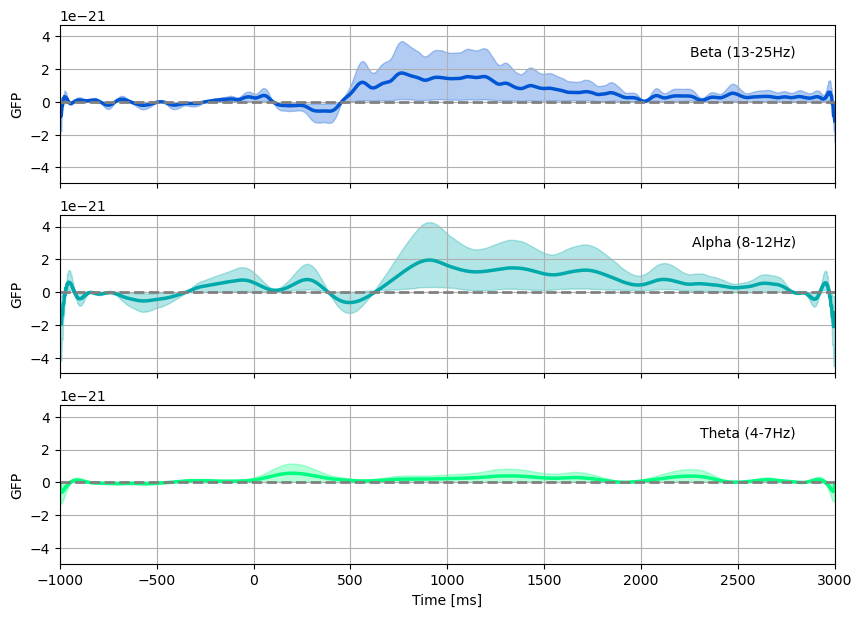

In [ ]:
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x**2, axis=0)


# Plot
fig, axes = plt.subplots(3, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.colormaps["winter_r"](np.linspace(0, 1, 4))
for ((freq_name, fmin, fmax), average), color, ax in zip(
    frequency_map, colors, axes.ravel()[::-1]
):
    times = average.times * 1e3
    gfp = np.sum(average.data**2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle="--", color="grey", linewidth=2)
    ci_low, ci_up = bootstrap_confidence_interval(
        average.data, random_state=0, stat_fun=stat_fun
    )
    ci_low = rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel("GFP")
    ax.annotate(
        "%s (%d-%dHz)" % (freq_name, fmin, fmax),
        xy=(0.95, 0.8),
        horizontalalignment="right",
        xycoords="axes fraction",
    )
    ax.set_xlim(-1000, 3000)

axes.ravel()[-1].set_xlabel("Time [ms]")